<a href="https://colab.research.google.com/github/ShoebAgha/Pytorch/blob/main/Pytorch_Workflow_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Data (Preparing and Loading)**

In [16]:
from torch import nn
import torch
import matplotlib.pyplot as plt


In [39]:
w=0.7
b=1

start=0
end=10
step=0.2

X=torch.arange(start,end,step).float()

y=w*X+b+torch.rand_like(X)
y.unsqueeze_(dim=1)
X[:10],y[:10]

(tensor([0.0000, 0.2000, 0.4000, 0.6000, 0.8000, 1.0000, 1.2000, 1.4000, 1.6000,
         1.8000]),
 tensor([[1.8616],
         [1.3546],
         [2.1589],
         [1.6649],
         [2.5103],
         [2.5000],
         [2.7193],
         [2.4527],
         [2.4935],
         [2.5561]]))

In [40]:
train_split=int(0.8*len(X))
X_train,y_train =X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [23]:
def plot_predictions(train_data,train_labels, test_data, test_labels,predictions=None):
 plt.figure(figsize=(10,7))

 plt.scatter(train_data, train_labels, c='b', label="Training Data")
 plt.scatter(test_data, test_labels, c='g', label="Testing Data")

 if predictions is not None:
  plt.scatter(test_data, predictions, c='r', label="Predictions")

 plt.legend()









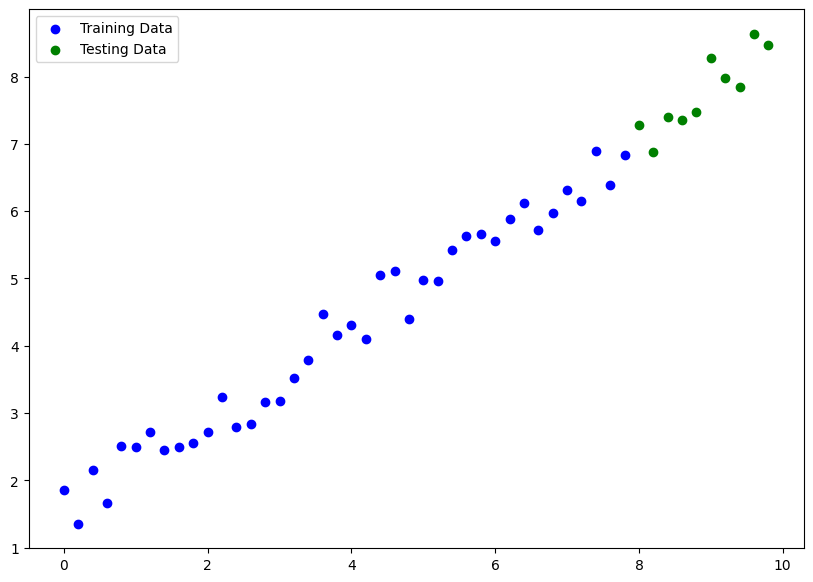

In [41]:
plot_predictions(X_train,y_train, X_test, y_test)

**Building Model**

In [44]:
from numpy import require
class LinearRegressionModel(nn.Module):
  def __init__(self):
   super().__init__()
   self.weights = nn.Parameter(torch.randn(1, dtype=float), requires_grad=True)
   self.bias = nn.Parameter(torch.randn(1, dtype=float), requires_grad=True)

  def forward(self, x:torch.Tensor):
    return self.weights*x + self.bias



In [48]:
torch.manual_seed(50)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.4625], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([-0.1692], dtype=torch.float64, requires_grad=True)]

In [49]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.4625], dtype=torch.float64)),
             ('bias', tensor([-0.1692], dtype=torch.float64))])

In [50]:
with torch.inference_mode():
  y_pred=model_0(X_test)

y_pred

tensor([3.5307, 3.6232, 3.7157, 3.8082, 3.9007, 3.9932, 4.0857, 4.1782, 4.2707,
        4.3632], dtype=torch.float64)

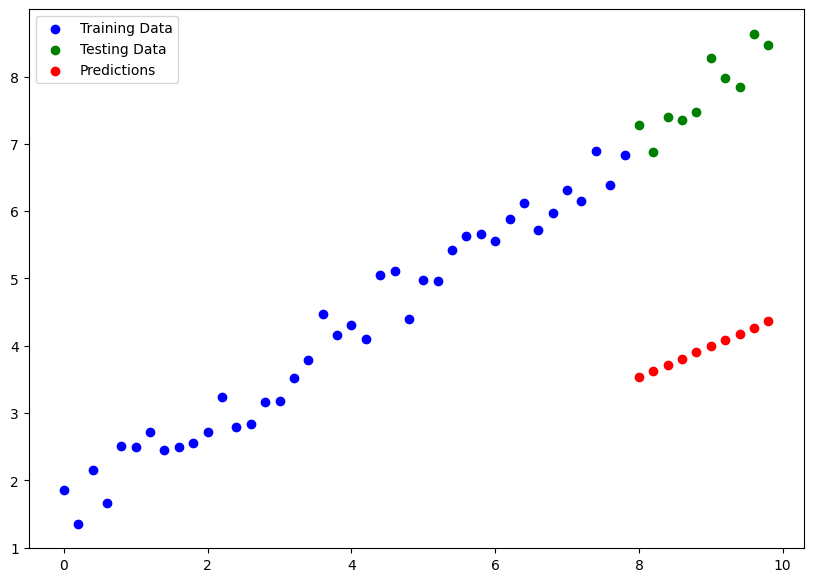

In [52]:
plot_predictions(X_train,y_train, X_test,y_test, y_pred)

**Setting Loss Function and Optimiser**

In [54]:
loss_fn = nn.L1Loss()

optimiser = torch.optim.SGD(params=model_0.parameters(), lr=0.01)